In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from wordcloud import WordCloud

In [4]:
#@title File reads
dft23_1 = pd.read_csv('../content/gdrive/My Drive/data/2023/june/train_2023.csv')

<ipython-input-4-0ec28028cec6>:2: DtypeWarning: Columns (20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dft23_1 = pd.read_csv('../content/gdrive/My Drive/data/2023/june/train_2023.csv')


In [5]:
dft23_2 = pd.read_csv('../content/gdrive/My Drive/data/2023/march/train_2023.csv')

In [6]:
dft23_3 = pd.read_csv('../content/gdrive/My Drive/data/2023/september/train_2023.csv')

In [7]:
#@title concat
full23 = pd.concat([dft23_1, dft23_2, dft23_3], axis = 0)

<Axes: title={'center': 'count'}, xlabel='room_type'>

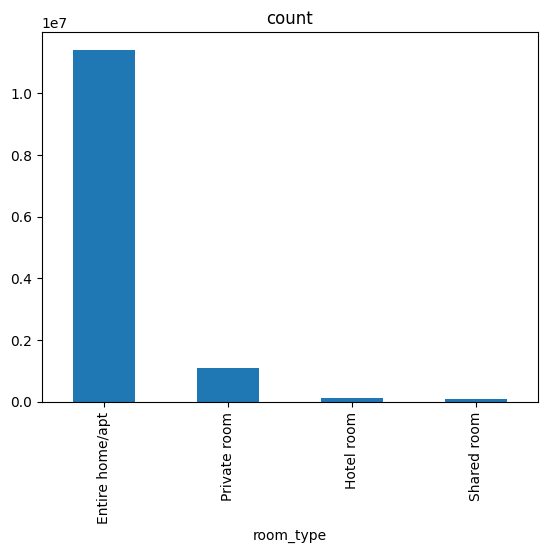

In [ ]:
#@title 1.1
df_test = full23['room_type'].value_counts().to_frame()


df_test['count'].plot(kind='bar', title='count')

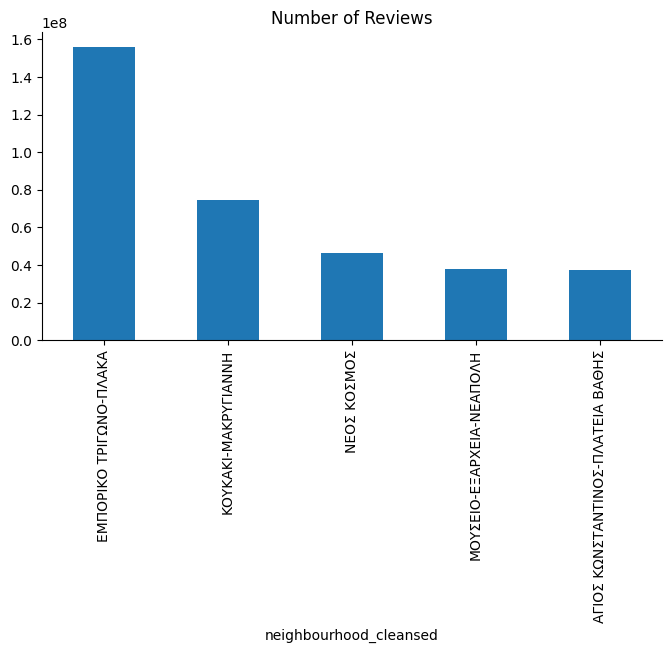

In [ ]:
# @title 1.3

group = full23.groupby("neighbourhood_cleansed")[["number_of_reviews"]].sum()  #sum up all reviews for all neighbourhoods
group2 = group.nlargest(5, 'number_of_reviews') #take only the 5 largest counts

group2['number_of_reviews'].plot(kind='bar', figsize=(8, 4), title='Number of Reviews') #neighbourhood and review count graph
plt.gca().spines[['top', 'right']].set_visible(False)

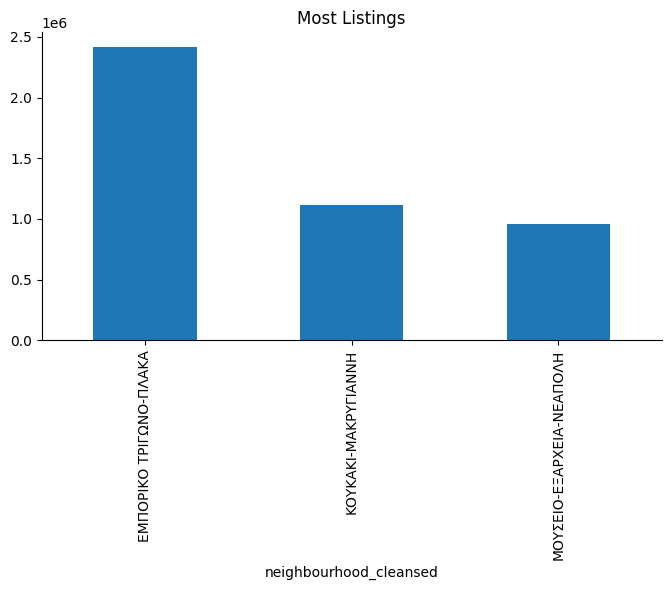

In [ ]:
#@title 1.4
group = full23.groupby("neighbourhood_cleansed")[["listing_id"]].count() #count listings
group2 = group.nlargest(3, 'listing_id')  #show the top 3 counts to compare with the one with the most listings


group2['listing_id'].plot(kind='bar', figsize=(8, 4), title='Most Listings')
plt.gca().spines[['top', 'right']].set_visible(False)

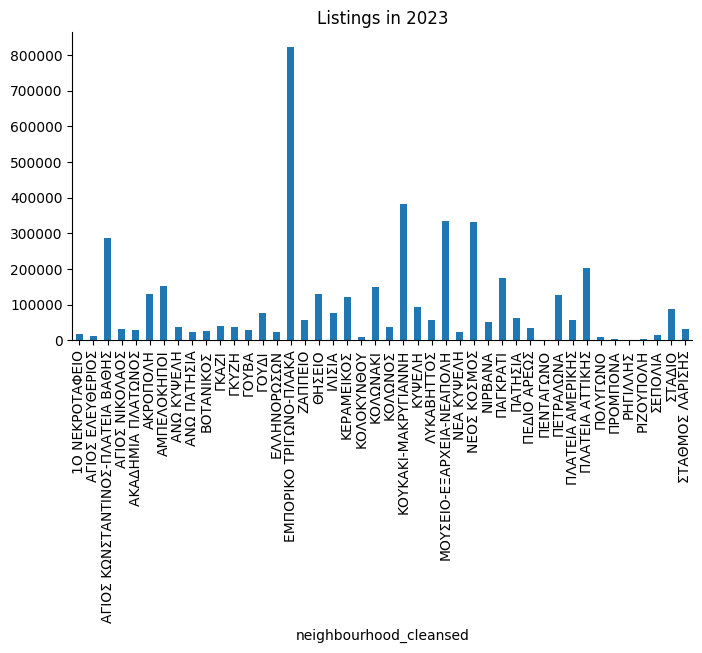

In [ ]:
#@title 1.5
group23 = dft23_1.groupby("neighbourhood_cleansed")[["listing_id"]].count()

group23['listing_id'].plot(kind='bar', figsize=(8, 4), title='Listings in 2023')
plt.gca().spines[['top', 'right']].set_visible(False)

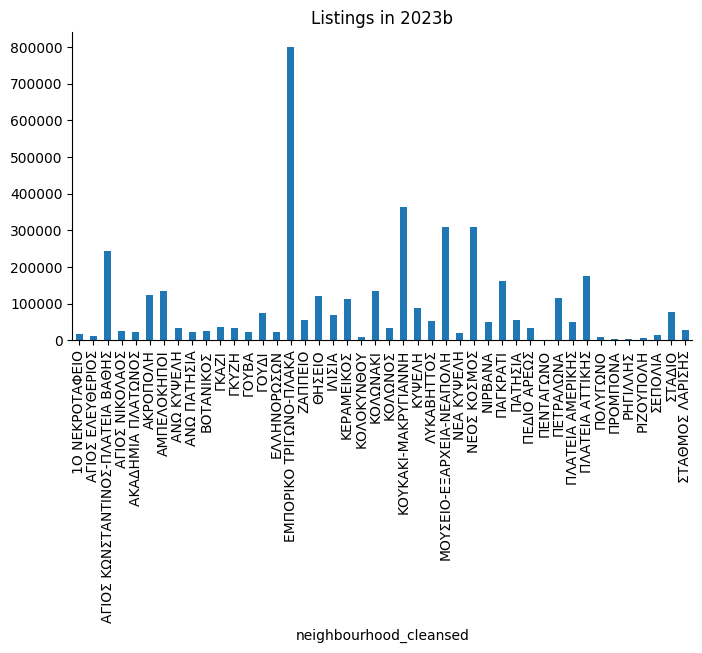

In [ ]:
group23b = dft23_2.groupby("neighbourhood_cleansed")[["listing_id"]].count()

group23b['listing_id'].plot(kind='bar', figsize=(8, 4), title='Listings in 2023b')
plt.gca().spines[['top', 'right']].set_visible(False)

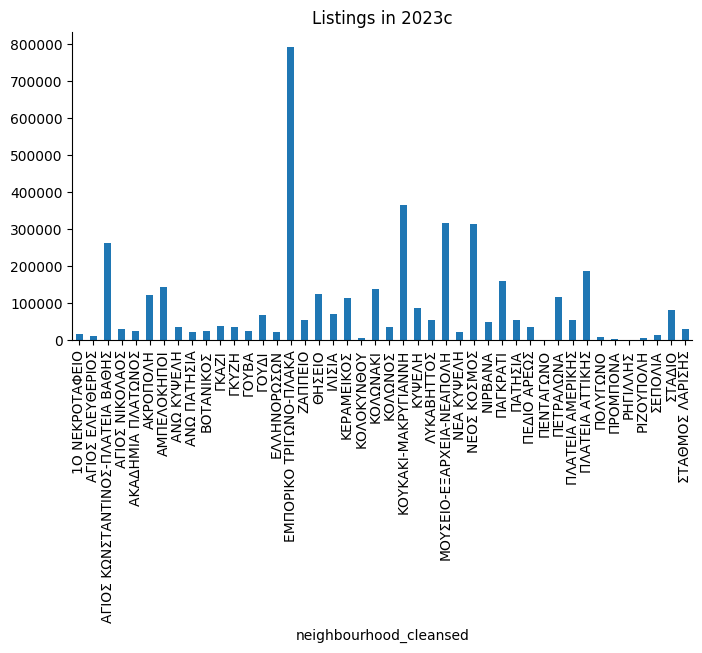

In [ ]:
group23c = dft23_3.groupby("neighbourhood_cleansed")[["listing_id"]].count()

group23c['listing_id'].plot(kind='bar', figsize=(8, 4), title='Listings in 2023c')
plt.gca().spines[['top', 'right']].set_visible(False)

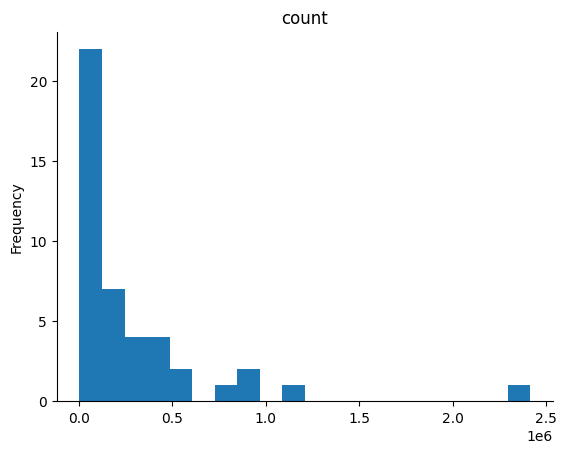

In [ ]:
#@title 1.6
test = full23['neighbourhood_cleansed'].value_counts().to_frame()

test['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#@title 1.7
df_test = full23.groupby('neighbourhood_cleansed')[['room_type']].value_counts().to_frame()

df_test['count'].plot(kind='bar', figsize=(8, 4), title='room types per neighbourhood')
plt.gca().spines[['top', 'right']].set_visible(False)


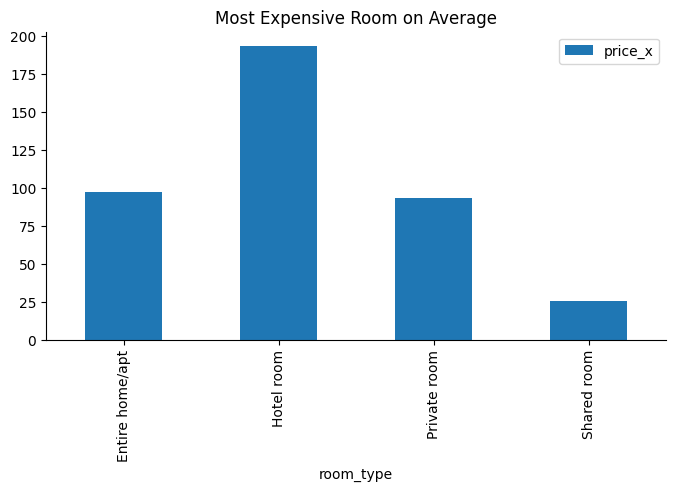

In [ ]:
#@title 1.8
df_room = full23.groupby('room_type')[['price_x']].mean()

df_room.plot(kind='bar', figsize=(8, 4), title='Most Expensive Room on Average')
plt.gca().spines[['top', 'right']].set_visible(False)

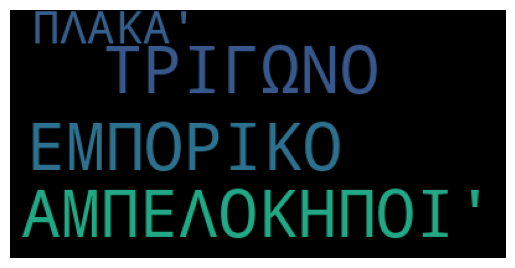

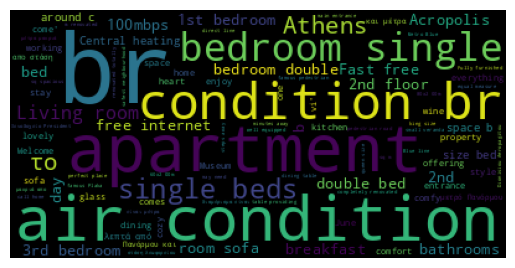

In [9]:
#@title 1.10
text = full23['neighbourhood_cleansed'].values
wordcloud = WordCloud().generate(str(text))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


text3 = full23['description'].values
wordcloud3 = WordCloud().generate(str(text3))
# Generate plot
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
#@title 1.12
#we use a mask to only get rooms that accommodate exactly 2 people
value = [2]
mask = full23['accommodates'].isin(value)
active = full23[mask]

<Axes: xlabel='neighbourhood_cleansed'>

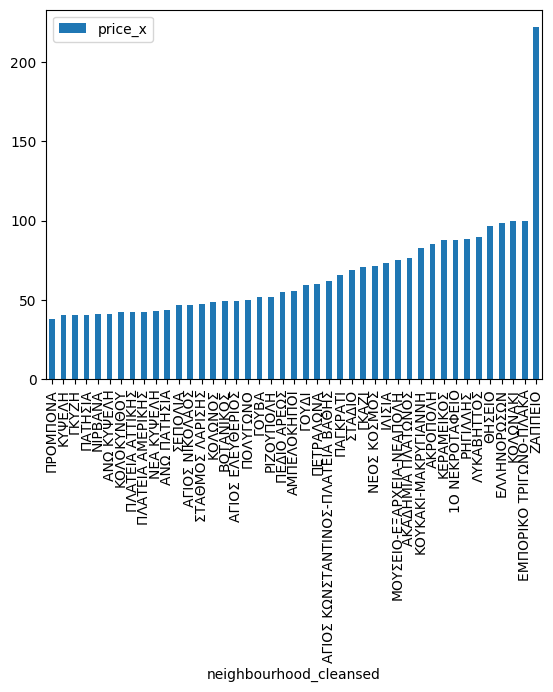

In [ ]:
gr = active.groupby(['neighbourhood_cleansed', 'accommodates'], as_index = False)[['price_x']].mean().sort_values(['price_x'])

gr.plot(x="neighbourhood_cleansed", y=["price_x"], kind="bar")

In [ ]:
avg = gr['price_x'].mean()
deviation = 0.1*avg
deviation

average = []
economic = []
costly = []



for i in range(len(gr)):
  if gr.iloc[i]['price_x'] > (avg + deviation):
    costly.append(gr.iloc[i]['neighbourhood_cleansed'])
  elif gr.iloc[i]['price_x'] < (avg - deviation):
    economic.append(gr.iloc[i]['neighbourhood_cleansed'])
  else:
    average.append(gr.iloc[i]['neighbourhood_cleansed'])

av = pd.DataFrame(average, columns = ['Average Neighbourhoods'])
co = pd.DataFrame(costly, columns = ['Costly Neighbourhoods'])
eco = pd.DataFrame(economic, columns = ['Cheap Neighbourhoods'])

print(eco)
print(av)
print(co)

   Cheap Neighbourhoods
0              ΠΡΟΜΠΟΝΑ
1                ΚΥΨΕΛΗ
2                 ΓΚΥΖΗ
3               ΠΑΤΗΣΙΑ
4               ΝΙΡΒΑΝΑ
5            ΑΝΩ ΚΥΨΕΛΗ
6            ΚΟΛΟΚΥΝΘΟΥ
7       ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ
8      ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ
9            ΝΕΑ ΚΥΨΕΛΗ
10          ΑΝΩ ΠΑΤΗΣΙΑ
11              ΣΕΠΟΛΙΑ
12       ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ
13      ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ
14              ΚΟΛΩΝΟΣ
15            ΒΟΤΑΝΙΚΟΣ
16     ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
17             ΠΟΛΥΓΩΝΟ
18                ΓΟΥΒΑ
19            ΡΙΖΟΥΠΟΛΗ
20          ΠΕΔΙΟ ΑΡΕΩΣ
21          ΑΜΠΕΛΟΚΗΠΟΙ
             Average Neighbourhoods
0                             ΓΟΥΔΙ
1                         ΠΕΤΡΑΛΩΝΑ
2  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
3                          ΠΑΓΚΡΑΤΙ
4                            ΣΤΑΔΙΟ
5                             ΓΚΑΖΙ
6                       ΝΕΟΣ ΚΟΣΜΟΣ
       Costly Neighbourhoods
0                     ΙΛΙΣΙΑ
1   ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
2          ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ
3        ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
4              

<Axes: title={'center': 'count'}, xlabel='property_type'>

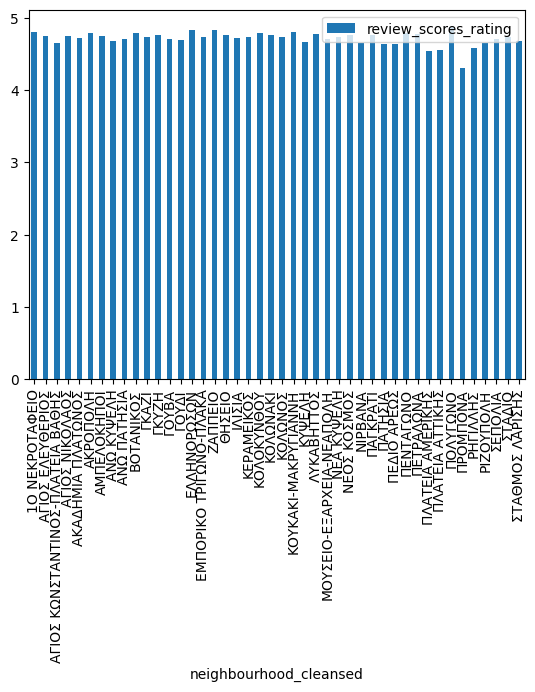

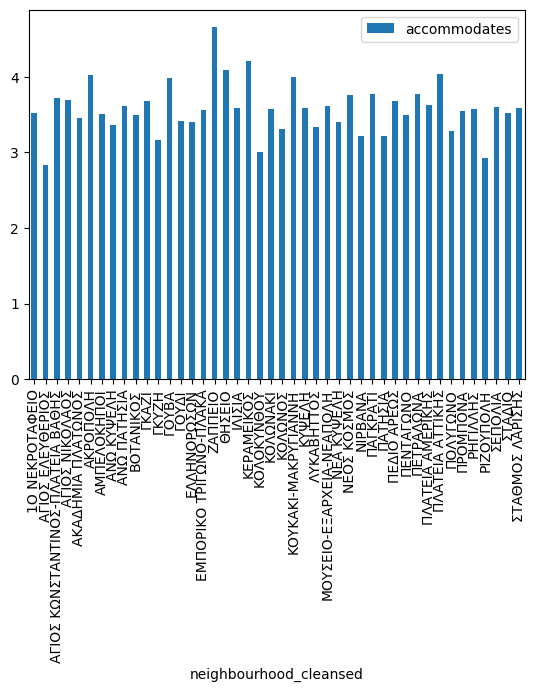

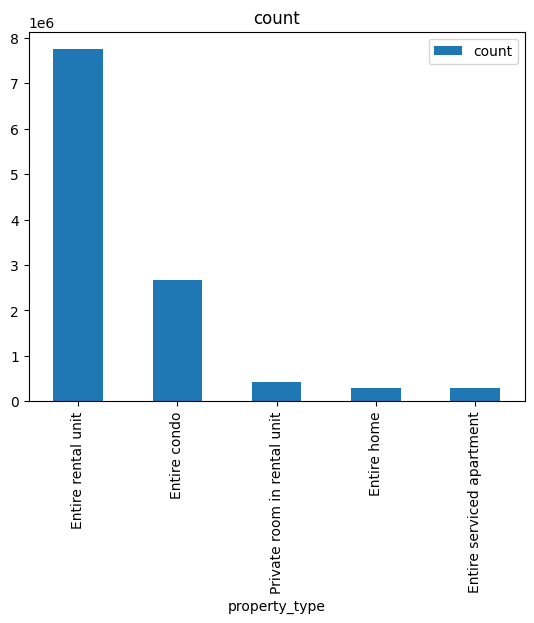

In [ ]:
#@title 1.13
rev = full23.groupby('neighbourhood_cleansed')[['review_scores_rating']].mean()  #1. average review scores for each neighbourhood
rev.plot(kind = 'bar')

occ = full23.groupby('neighbourhood_cleansed')[['accommodates']].mean() #2. average number of people rooms can accommodate in each neighbourhood
occ.plot(kind = 'bar')

df_prop = full23['property_type'].value_counts().to_frame()  #3. top 5 most popular property types in Athens
df_prop5 = df_prop.head(5)

df_prop5.plot(kind='bar', title='count')

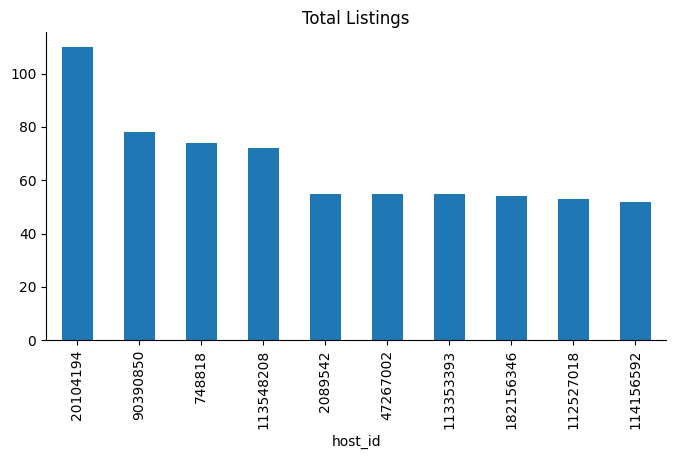

In [ ]:
# @title 1.14
dfl23 = pd.read_csv('../content/gdrive/My Drive/data/2023/june/listings.csv')
bnb = dfl23.groupby("host_id")[["id"]].count()
bnb2 = bnb.nlargest(10, 'id') #10 host ids with the most listings

bnb2['id'].plot(kind='bar', figsize=(8, 4), title='Total Listings')
plt.gca().spines[['top', 'right']].set_visible(False)